In [4]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

# wrangle
# from env import user, password, host
import os

# transform
import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

# working with dates
from datetime import datetime

# modeling
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing

# evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt 


from wrangle_final import wrangle_metro_data

In [5]:
# get data
df, train, v,  test = wrangle_metro_data()

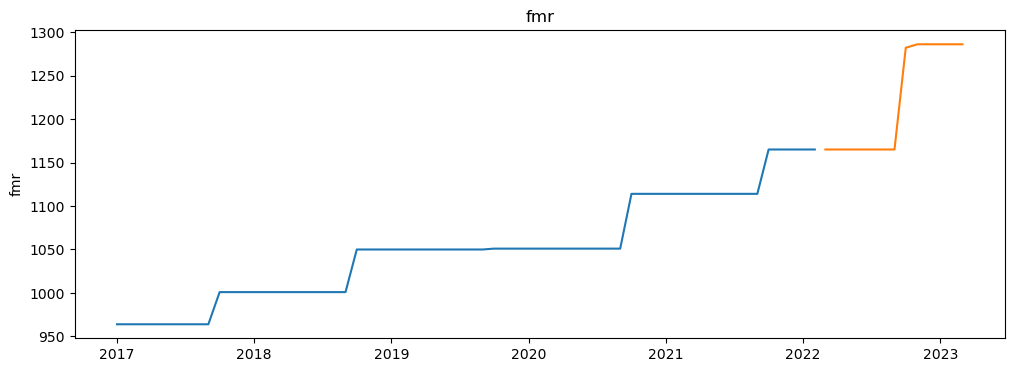

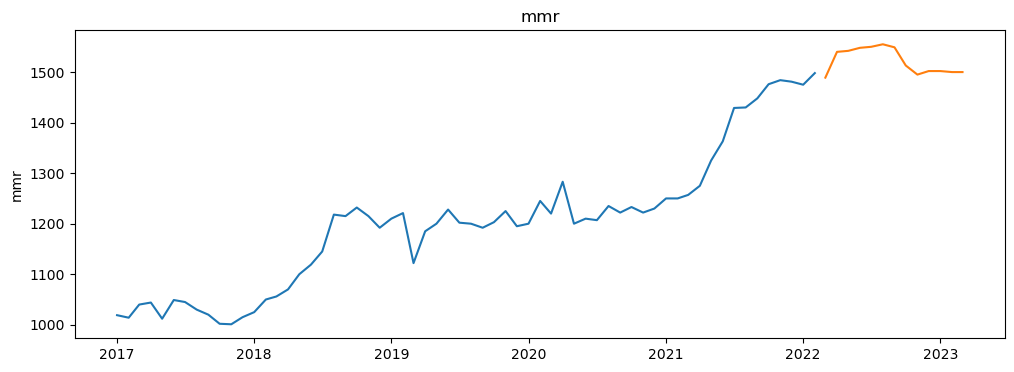

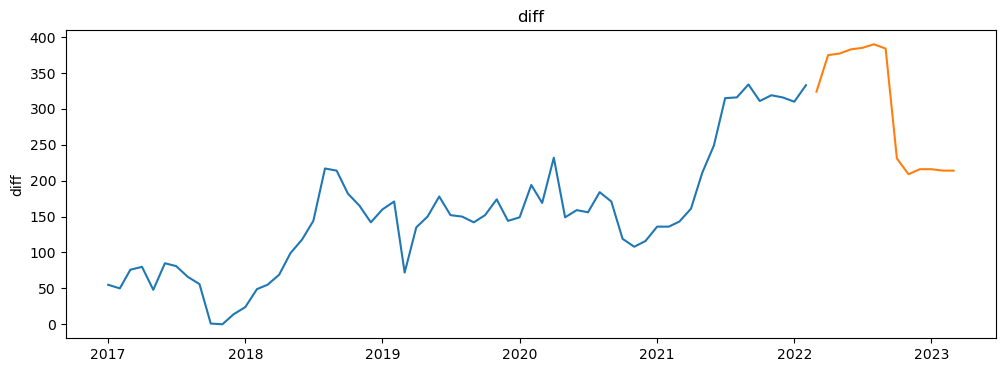

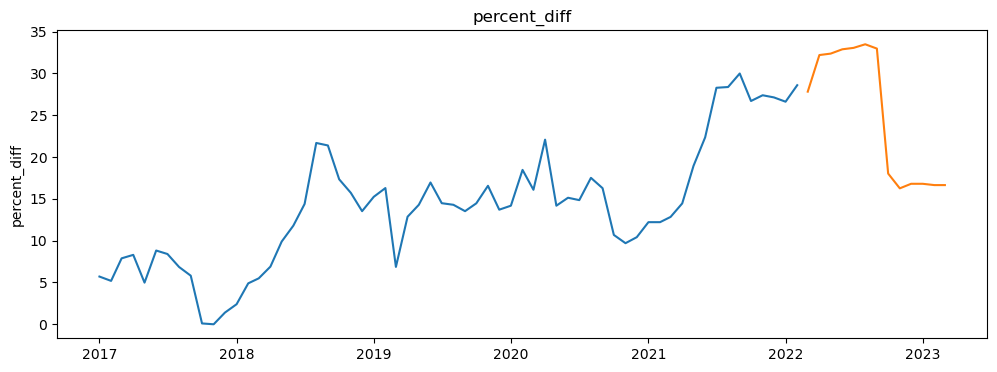

In [4]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()


In [5]:
# evaluation function to compute rmse
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(test[target_var], yhat_df[target_var])), 0)
    return rmse


In [6]:
# plot and evaluate 
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(test[target_var], label = 'Test', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


In [7]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [8]:
# evaluation function to compute rmse
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(test[target_var], yhat_df[target_var])), 0)
    return rmse


# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return pd.concat([eval_df, d])


In [9]:
train = train.drop('percent_diff', axis=1)

In [10]:
# take the last item of sales total and assign to variable
last_diff = train['diff'][-1:][0]
last_mmr = train['mmr'][-1:][0]
last_fmr = train['fmr'][-1:][0]
# last_per = train['percent_diff'][-1:][0]

yhat_df = pd.DataFrame(
    {'diff': [last_diff],
     'mmr': [last_mmr],
    'fmr': [last_fmr]},
    index=test.index)

yhat_df.head()

,diff,mmr,fmr
2022-03-01,333.0,1498.0,1165.0
2022-04-01,333.0,1498.0,1165.0
2022-05-01,333.0,1498.0,1165.0
2022-06-01,333.0,1498.0,1165.0
2022-07-01,333.0,1498.0,1165.0


fmr -- RMSE: 82


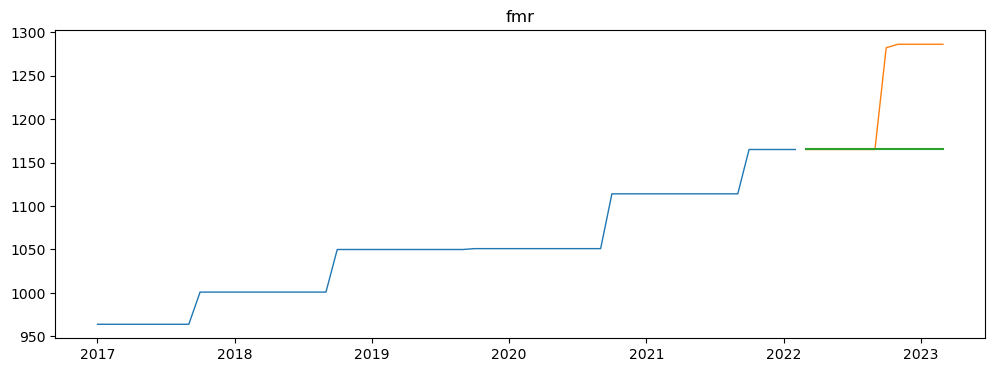

mmr -- RMSE: 34


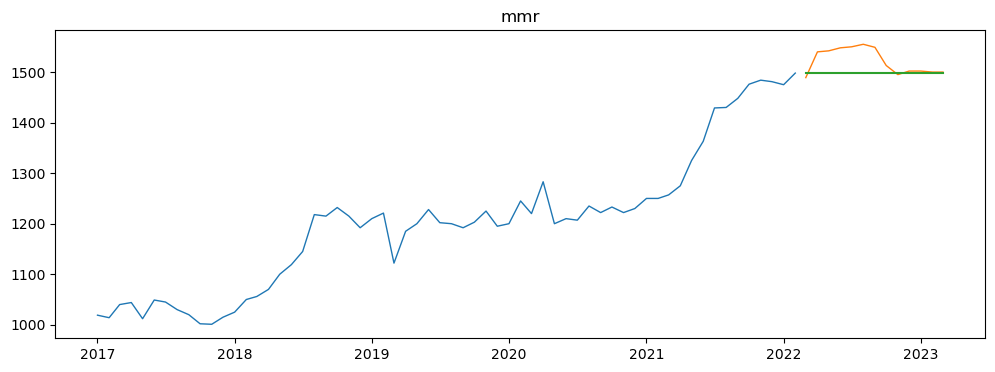

diff -- RMSE: 86


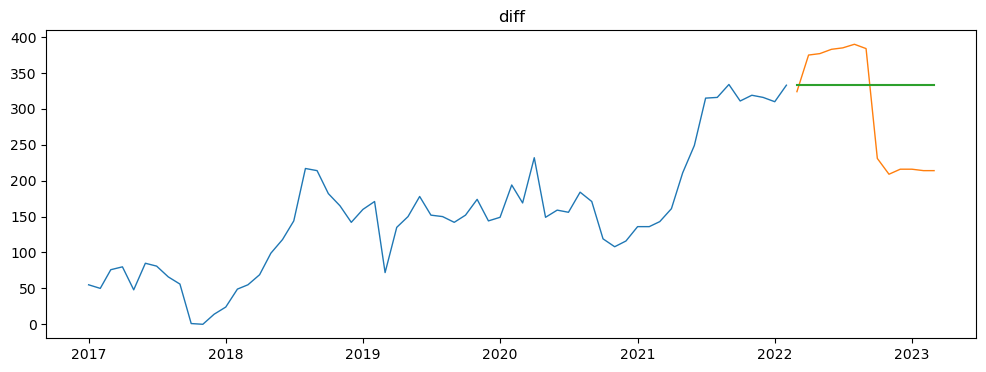

In [11]:
for col in train.columns:
    plot_and_eval(col)


In [12]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)

In [13]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,fmr,82.0
0,last_observed_value,mmr,34.0
0,last_observed_value,diff,86.0


In [14]:
# compute simple average of sales_total (from train data)
avg_diff = round(train['diff'].mean(), 2)

# compute simple average of quantity (from train data)
avg_mmr = round(train['mmr'].mean(), 2)

avg_fmr = round(train['fmr'].mean(), 2)


yhat_df = pd.DataFrame({'diff': [avg_diff],
                        'mmr': [avg_mmr],
                       'fmr': [avg_mmr]},
                        index=test.index)

yhat_df.head(3)


,diff,mmr,fmr
2022-03-01,151.06,1200.95,1200.95
2022-04-01,151.06,1200.95,1200.95
2022-05-01,151.06,1200.95,1200.95


fmr -- RMSE: 63


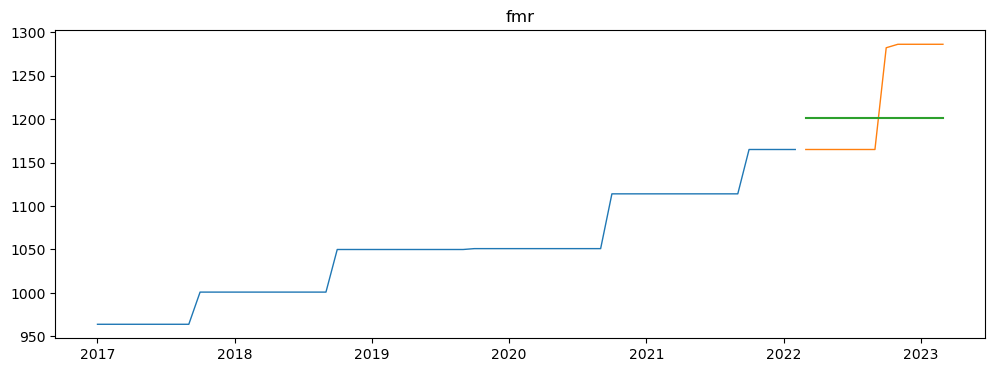

mmr -- RMSE: 322


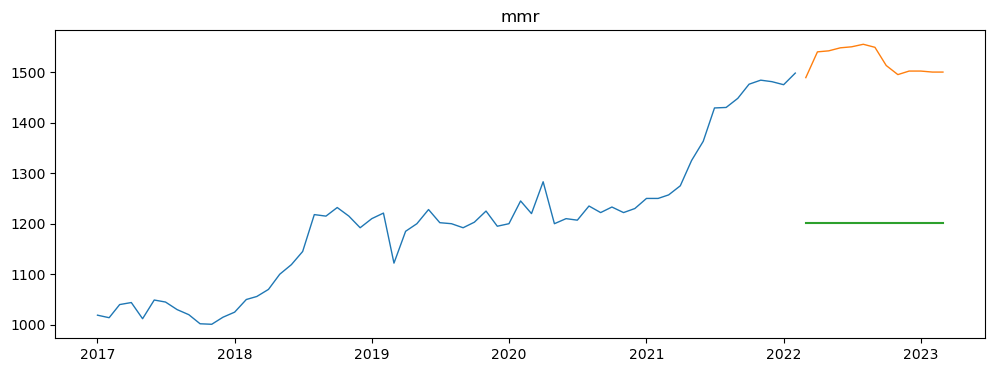

diff -- RMSE: 170


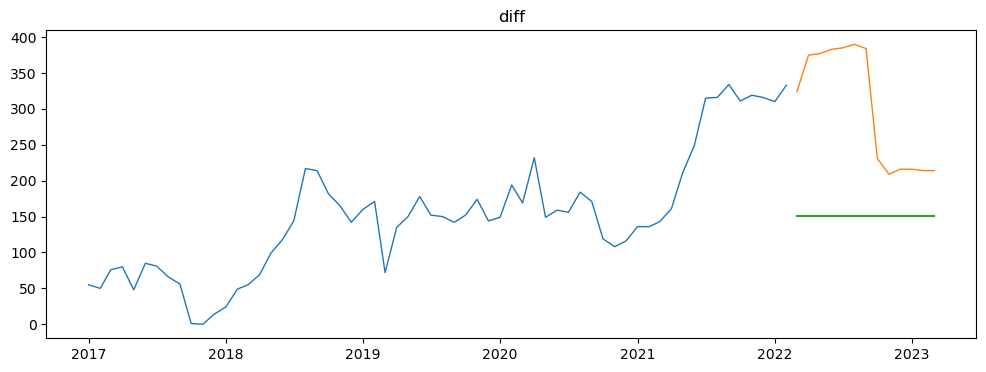

In [15]:
for col in train.columns:
    plot_and_eval(col)

In [16]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                             target_var = col)
eval_df


,model_type,target_var,rmse
0,last_observed_value,fmr,82.0
0,last_observed_value,mmr,34.0
0,last_observed_value,diff,86.0
0,simple_average,fmr,63.0
0,simple_average,mmr,322.0
0,simple_average,diff,170.0


In [17]:
# compute a yearly rolling average
# use the most recent/last 30 day period value to predict forward. 

period = 12

rolling_diff = round(train['diff'].rolling(period).mean()[-1], 2)
rolling_mmr = round(train['mmr'].rolling(period).mean()[-1], 2)
rolling_fmr = round(train['fmr'].rolling(period).mean()[-1], 2)

# yhat_df = make_predictions()

yhat_df = pd.DataFrame({'diff': [rolling_diff],
                        'mmr': [rolling_mmr],
                       'fmr': [rolling_mmr]},
                         index=test.index)
yhat_df.head()


,diff,mmr,fmr
2022-03-01,276.5,1411.75,1411.75
2022-04-01,276.5,1411.75,1411.75
2022-05-01,276.5,1411.75,1411.75
2022-06-01,276.5,1411.75,1411.75
2022-07-01,276.5,1411.75,1411.75


fmr -- RMSE: 200


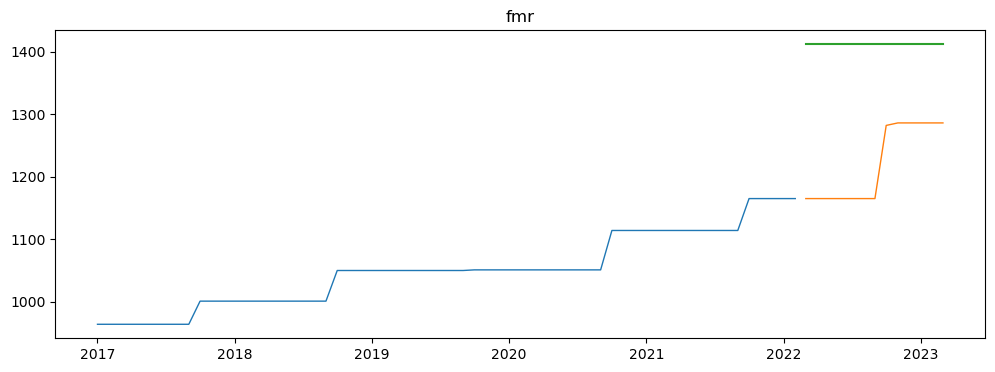

mmr -- RMSE: 113


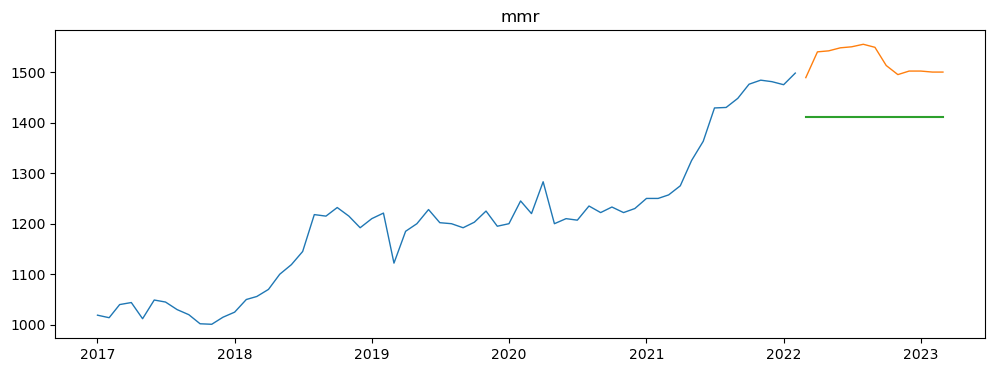

diff -- RMSE: 84


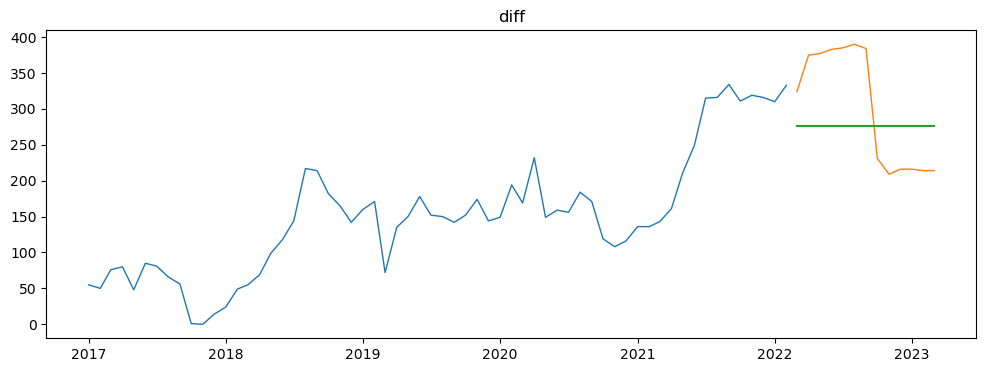

In [18]:
for col in train.columns:
    plot_and_eval(col)

In [19]:
for col in train.columns:
    eval_df = append_eval_df(model_type='yearly moving average', 
                             target_var = col)
eval_df


,model_type,target_var,rmse
0,last_observed_value,fmr,82.0
0,last_observed_value,mmr,34.0
0,last_observed_value,diff,86.0
0,simple_average,fmr,63.0
0,simple_average,mmr,322.0
0,simple_average,diff,170.0
0,yearly moving average,fmr,200.0
0,yearly moving average,mmr,113.0
0,yearly moving average,diff,84.0


In [20]:
periods = [1, 6, 24, 36]

for p in periods: 
    rolling_diff = round(train['diff'].rolling(p).mean()[-1], 2)
    rolling_mmr = round(train['mmr'].rolling(p).mean()[-1], 2)
    rolling_fmr = round(train['fmr'].rolling(p).mean()[-1], 2)

    # yhat_df = make_predictions()

    yhat_df = pd.DataFrame({'diff': [rolling_diff],
                            'mmr': [rolling_mmr],
                           'fmr': [rolling_mmr]},
                             index=test.index)

    model_type = str(p) + '_month_moving_avg'
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type,
                                target_var = col)

In [21]:
eval_df.sort_values(by='rmse').groupby(['target_var', 'model_type']).min()

rmse
target_var model_type                  
diff       1_month_moving_avg      86.0
           24_month_moving_avg    118.0
           36_month_moving_avg    135.0
           6_month_moving_avg      82.0
           last_observed_value     86.0
           simple_average         170.0
           yearly moving average   84.0
fmr        1_month_moving_avg     284.0
           24_month_moving_avg    117.0
           36_month_moving_avg     85.0
           6_month_moving_avg     263.0
           last_observed_value     82.0
           simple_average          63.0
           yearly moving average  200.0
mmr        1_month_moving_avg      34.0
           24_month_moving_avg    202.0
           36_month_moving_avg    243.0
           6_month_moving_avg      51.0
           last_observed_value     34.0
           simple_average         322.0
           yearly moving average  113.0

In [22]:
‘


SyntaxError: invalid character '‘' (U+2018) (1834058521.py, line 1)

In [ ]:
# get the min rmse for each variable

min_rmse_diff = eval_df.groupby('target_var')['rmse'].min()[0]
min_rmse_fmr = eval_df.groupby('target_var')['rmse'].min()[1]
min_rmse_mmr = eval_df.groupby('target_var')['rmse'].min()[2]

In [ ]:
min_rmse_mmr

In [ ]:
# filter only the rows that match those rmse to find out 
# which models are best thus far
eval_df[(((eval_df.rmse == min_rmse_diff) & (eval_df.target_var == 'diff')) | 
         ((eval_df.rmse == min_rmse_fmr) & (eval_df.target_var == 'fmr')) |
         ((eval_df.rmse == min_rmse_mmr) & (eval_df.target_var == 'mmr')) 
        )]

# Baslines Functions

In [1]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

# transform
import numpy as np
import pandas as pd

# working with dates
from datetime import datetime

# evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt 


from wrangle import wrangle_data

In [3]:
df, train, validate, test = wrangle_data()

In [14]:
def get_eval_df():
    '''
    Creates a dataframe to hold the model target and rmse
    '''
    # Create the empty dataframe
    eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
    
    # exit and return the empty df
    return eval_df

In [3]:
eval_df = get_eval_df()

In [80]:
def get_baseline_simple_average():
    '''
    This function uses the global train variables o calculate the simple average for each column in train.
    It stores the information for each variable in a df that uses the test.index and returns that df
    '''
    # initialize df
    d = pd.DataFrame(index=test.index)
    
    # for each column
    for col in train.columns:
        
        # calculate the simple average
        simple_avg = round(train[col].mean(), 2)
        
        # add the simple average into the column
        d[col] = simple_avg
    
    # exit and return df
    return d

In [5]:
get_baseline_simple_average()

,fmr,mmr,diff,percent_diff
2022-03-01,1049.89,1200.95,151.06,14.09
2022-04-01,1049.89,1200.95,151.06,14.09
2022-05-01,1049.89,1200.95,151.06,14.09
2022-06-01,1049.89,1200.95,151.06,14.09
2022-07-01,1049.89,1200.95,151.06,14.09
2022-08-01,1049.89,1200.95,151.06,14.09
2022-09-01,1049.89,1200.95,151.06,14.09
2022-10-01,1049.89,1200.95,151.06,14.09
2022-11-01,1049.89,1200.95,151.06,14.09
2022-12-01,1049.89,1200.95,151.06,14.09


In [ ]:
# get_baseline_simple_avg()

In [ ]:
# # def get_eval_df_simple
# # for each column
# for col in train.columns:

#     # add a row in the eval df
#     eval_df = append_eval_df(model_type=yhat_df['model_type'], 
#                              target_var = col)
# eval_df

In [1]:
def get_baseline_rolling_average(period = 1):
    '''
    This function takes in a period as an argument and calculates the rolling/moving average based on that period.
    It then returns the rolling average for each column in train in a dartaframe
    '''
    # create dict
    d = pd.DataFrame(index=validate.index)
    
    # for each col in train
    for col in train.columns:

        # get the rolling mean
        rolling = round(train[col].rolling(period).mean()[-1], 2)
        
        # add column with rolling mean in it
        d[col] = rolling

    # return the df
    return d

In [8]:
get_baseline_rolling_average(6)

,fmr,mmr,diff,percent_diff
2022-03-01,1156.5,1477.0,320.5,27.73
2022-04-01,1156.5,1477.0,320.5,27.73
2022-05-01,1156.5,1477.0,320.5,27.73
2022-06-01,1156.5,1477.0,320.5,27.73
2022-07-01,1156.5,1477.0,320.5,27.73
2022-08-01,1156.5,1477.0,320.5,27.73
2022-09-01,1156.5,1477.0,320.5,27.73
2022-10-01,1156.5,1477.0,320.5,27.73
2022-11-01,1156.5,1477.0,320.5,27.73
2022-12-01,1156.5,1477.0,320.5,27.73


In [ ]:
df, train, test = wrangle_data()

In [9]:
# evaluation function to compute rmse
def evaluate(yhat_df, target_var):
    '''
    This function will take the actual values of the target_var from test, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    # gets the rmse and rounds to 0 decimals places
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    
    # returns the rmse 
    return rmse


# function to store rmse for comparison purposes
def append_eval_df(yhat_df, model_type, target_var):
    '''
    this function takes in the yhat_df used, type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    
    # get the rmse
    rmse = evaluate(yhat_df, target_var)
    
    # create a dictionary to store relevant information
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    
    # convert to df
    d = pd.DataFrame(d)
    
    # return the df
    return d


In [78]:
def get_baseline_table():
    '''
    This function creates a datafram with the baseline model rmse's for each feature in the tain df
    '''
    # get eval_df
    eval_df = get_eval_df()
    
    # Create list of baseline tables with the model name as a pairt
    models_and_type = [(get_baseline_simple_average(), 'simple_avg'), (get_baseline_rolling_average(1), '1_month_rolling_average'), (get_baseline_rolling_average(6), '6_month_rolling_avg')]

    # for each df and modeltype
    for model, model_type in models_and_type:

        # for each columns in df
        for col in train.columns:

            # add to the eval_df
            new_eval_df = append_eval_df(model, model_type=model_type,
                                    target_var=col)
            
            # concat new eval with old eval
            eval_df = pd.concat([eval_df, new_eval_df])
    
    # exit and return eval df with all evaluations
    return eval_df.reset_index().drop('index', axis=1).groupby(['target_var', 'model_type'], sort=True).min()

In [33]:
train.columns

Index(['fmr', 'mmr', 'diff', 'percent_diff'], dtype='object')

In [77]:
get_baseline_table()

rmse
target_var   model_type                    
diff         1_month_rolling_average   86.0
             6_month_rolling_avg       82.0
             simple_avg               170.0
fmr          1_month_rolling_average   82.0
             6_month_rolling_avg       88.0
             simple_avg               181.0
mmr          1_month_rolling_average   34.0
             6_month_rolling_avg       51.0
             simple_avg               322.0
percent_diff 1_month_rolling_average    8.0
             6_month_rolling_avg        8.0
             simple_avg                13.0

In [51]:
train.columns, test.columns

(Index(['fmr', 'mmr', 'diff', 'percent_diff'], dtype='object'),
 Index(['fmr', 'mmr', 'diff', 'percent_diff'], dtype='object'))

In [24]:
yhat_df = pd.DataFrame(index=validate.index)

In [25]:
yhat_df

""
2022-03-01
2022-04-01
2022-05-01
2022-06-01
2022-07-01
2022-08-01
2022-09-01
2022-10-01
2022-11-01
2022-12-01


In [37]:
# get_baseline_table()

In [52]:
# Create list of baseline tables with the model name as a pairt
models_and_type = [(get_baseline_simple_average(), 'simple_avg'), (get_baseline_rolling_average(1), '1_month_rolling_average'), (get_baseline_rolling_average(6), '6_month_rolling_avg')]

# for each df and modeltype
for model, model_type in models_and_type:

    # initialize yhat datafframe
    yhat_df = model
    
    # for each columns in df
    for col in train.columns:

        # add to the eval_df
        eval_df = append_eval_df(model_type=model_type,
                                target_var=col)
eval_df

,model_type,target_var,rmse
0,simple_avg,fmr,181.0
0,simple_avg,mmr,322.0
0,simple_avg,diff,170.0
0,simple_avg,percent_diff,13.0
0,1_month_rolling_average,fmr,82.0
0,1_month_rolling_average,mmr,34.0
0,1_month_rolling_average,diff,86.0
0,1_month_rolling_average,percent_diff,8.0
0,6_month_rolling_avg,fmr,88.0
0,6_month_rolling_avg,mmr,51.0


In [39]:
get_baseline_simple_average()

,fmr,mmr,diff,percent_diff,model_type
2022-03-01,1049.89,1200.95,151.06,14.09,simple_average
2022-04-01,1049.89,1200.95,151.06,14.09,simple_average
2022-05-01,1049.89,1200.95,151.06,14.09,simple_average
2022-06-01,1049.89,1200.95,151.06,14.09,simple_average
2022-07-01,1049.89,1200.95,151.06,14.09,simple_average
2022-08-01,1049.89,1200.95,151.06,14.09,simple_average
2022-09-01,1049.89,1200.95,151.06,14.09,simple_average
2022-10-01,1049.89,1200.95,151.06,14.09,simple_average
2022-11-01,1049.89,1200.95,151.06,14.09,simple_average
2022-12-01,1049.89,1200.95,151.06,14.09,simple_average


ValueError: Found input variables with inconsistent numbers of samples: [13, 26]

In [ ]:
get_baseline_rolling_average(6)

In [ ]:
eval_df.groupby(['target_var', 'model_type']).min()

In [ ]:
# filter only the rows that match those rmse to find out 
# which models are best thus far
eval_df[(((eval_df.rmse == min_rmse_diff) & (eval_df.target_var == 'diff')) | 
         ((eval_df.rmse == min_rmse_fmr) & (eval_df.target_var == 'fmr')) |
         ((eval_df.rmse == min_rmse_mmr) & (eval_df.target_var == 'mmr')) 
        )]

# Get only one baseline

In [2]:
from wrangle_final import wrangle_metro_data
from wrangle import wrangle_data

In [3]:
df, train, validate, test = wrangle_metro_data()

In [19]:
df

,fmr,mmr,diff,percent_diff
2017-01-01,964.0,1019.0,55.0,0.057054
2017-02-01,964.0,1014.0,50.0,0.051867
2017-03-01,964.0,1040.0,76.0,0.078838
2017-04-01,964.0,1044.0,80.0,0.082988
2017-05-01,964.0,1012.0,48.0,0.049793
...,...,...,...,...
2022-11-01,1286.0,1495.0,209.0,0.162519
2022-12-01,1286.0,1502.0,216.0,0.167963
2023-01-01,1286.0,1502.0,216.0,0.167963
2023-02-01,1286.0,1500.0,214.0,0.166407


In [4]:
def get_baseline_rolling_average(period = 1):
    '''
    This function takes in a period as an argument and calculates the rolling/moving average based on that period.
    It then returns the rolling average for each column in train in a dartaframe
    '''
    # create dict
    d = pd.DataFrame(index=validate.index)
    
    # for each col in train
    for col in train.columns:

        # get the rolling mean
        rolling = round(train[col].rolling(period).mean()[-1], 2)
        
        # add column with rolling mean in it
        d[col] = rolling

    # return the df
    return d

In [5]:
def get_eval_df():
    '''
    Creates a dataframe to hold the model target and rmse
    '''
    # Create the empty dataframe
    eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
    
    # exit and return the empty df
    return eval_df

In [8]:
# evaluation function to compute rmse
def evaluate(yhat_df, target_var):
    '''
    This function will take the actual values of the target_var from test, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    # gets the rmse and rounds to 0 decimals places
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    
    # returns the rmse 
    return rmse


# function to store rmse for comparison purposes
def append_eval_df(yhat_df, model_type, target_var):
    '''
    this function takes in the yhat_df used, type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    
    # get the rmse
    rmse = evaluate(yhat_df, target_var)
    
    # create a dictionary to store relevant information
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    
    # convert to df
    d = pd.DataFrame(d)
    
    # return the df
    return d


In [6]:
def get_baseline_table():
    '''
    This function creates a datafram with the baseline model rmse's for each feature in the tain df
    '''
    # get eval_df
    eval_df = get_eval_df()
    
    # Create list of baseline tables with the model name as a pairt
    models_and_type = [(get_baseline_rolling_average(), '1_month_rolling_average')]

    # for each df and modeltype
    for model, model_type in models_and_type:

        # for each columns in df
        for col in train.columns:

            # add to the eval_df
            new_eval_df = append_eval_df(model, model_type=model_type,
                                    target_var=col)
            
            # concat new eval with old eval
            eval_df = pd.concat([eval_df, new_eval_df])
    
    # exit and return eval df with all evaluations
    return eval_df.reset_index().drop('index', axis=1).groupby(['target_var', 'model_type'], sort=True).min()

In [9]:
get_baseline_table()

,,rmse
target_var,model_type,
diff,1_month_rolling_average,98.0
fmr,1_month_rolling_average,72.0
mmr,1_month_rolling_average,158.0
percent_diff,1_month_rolling_average,8.0
